# CIS 4526 Sp23 HomeWork 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [4]:
df = pd.read_csv("/kaggle/input/adult-income-modified/adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


In [5]:
df.salary.unique()

array(['<=80K', '>80K'], dtype=object)

In [6]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [7]:
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

### Need to replace ?

In [8]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

### Your task is to try different Ensemble Models to predict whether a people will earn <= 80K or > 80K

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* separated data set into training and testing
* performed cross-validations
* Build a base model using LogisticRegression and only a smaller set of features (say only numerical features)
* Try different ensemble methods, including VotingClassifier (soft and hard voting), BaggingClassifier, AdaBoostClassifier, GradientBoostClassifier and xgb with the same set of features
* Comment on your experience in these various models, in particular compare this with the basic LogisticRegression
* Out of all these ensemble model, pick the best model, add additional featrues (eg categorical features)
* Comment on the final best model you find

### Good Luck !!!

Show all your work below

### EDA

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32571.000000,3.257100e+04,32571.000000,32571.000000,32571.000000,32571.000000
mean,38.599153,1.898091e+05,10.080747,1077.317982,87.435357,40.452151
std,13.744795,1.055927e+05,2.572484,7384.182377,403.204587,12.441330
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178215e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.371095e+05,12.000000,0.000000,0.000000,45.000000
max,250.000000,1.484705e+06,16.000000,99999.000000,4356.000000,202.000000


In [10]:
# remove data that are obviously wrong, no need to do it extensively, just use the above table as a hint
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [11]:
# .... TODO
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [12]:
df['capital-gain'].sort_values(ascending = False)[:100]

17648    99999
10772    99999
1529     99999
24517    99999
14580    99999
         ...  
16175    99999
16080    99999
7554     99999
31979    99999
18889    99999
Name: capital-gain, Length: 100, dtype: int64

In [13]:
# df.loc[df['capital-gain'] == 99999. ,'capital-gain'] = df['capital-gain'].median()
df.drop(df[df['capital-gain'] == 99999.].index,inplace=True)
df['capital-gain'].sort_values(ascending = False)[:100]

20183    41310
6434     41310
17040    34095
4569     34095
7187     34095
         ...  
17613    18481
6417     15831
21265    15831
32348    15831
15497    15831
Name: capital-gain, Length: 100, dtype: int64

In [14]:
df['capital-gain'].value_counts()

0        29859
15024      347
7688       284
7298       246
5178        97
         ...  
1639         1
4931         1
7978         1
2387         1
5060         1
Name: capital-gain, Length: 118, dtype: int64

In [15]:
df['capital-loss'].sort_values(ascending = False)[:100]

14757    4356
8964     4356
30788    4356
23809    3900
20423    3900
         ... 
30265    2415
1946     2415
3213     2415
13661    2415
1116     2415
Name: capital-loss, Length: 100, dtype: int64

In [16]:
df['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [17]:
df['capital-loss'].value_counts()

0       30890
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

In [18]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32412.000000,3.241200e+04,32412.000000,32412.000000,32412.000000,32412.000000
mean,38.561088,1.897936e+05,10.066827,592.048717,87.864279,40.406300
std,13.746646,1.056132e+05,2.565253,2559.885541,404.145761,12.424156
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177905e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783875e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370938e+05,12.000000,0.000000,0.000000,45.000000
max,250.000000,1.484705e+06,16.000000,41310.000000,4356.000000,202.000000


In [19]:
df['salary'].unique()

array(['<=80K', '>80K'], dtype=object)

<AxesSubplot:xlabel='salary', ylabel='count'>

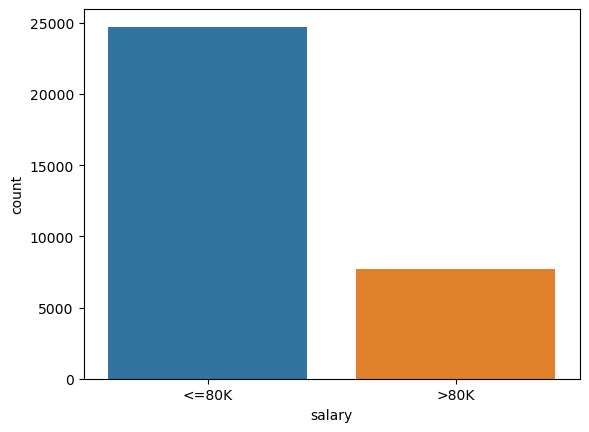

In [20]:
# df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
sns.countplot(x='salary',data=df)

In [21]:
numerical_features = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']
ndf = df[numerical_features]

In [22]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
X_train, X_test, y_train, y_test = train_test_split(ndf, 
                                                    df['salary'], test_size=0.20, 
                                                    random_state=100)

In [23]:
df.salary.unique()

array([0, 1])

### Before you try any more advance models, let's try a LogisticRegression model

In [24]:
model = LogisticRegression(random_state=100) # random_state=100
model.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [25]:
predictions = model.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5003
           1       0.68      0.24      0.35      1480

    accuracy                           0.80      6483
   macro avg       0.75      0.60      0.62      6483
weighted avg       0.78      0.80      0.76      6483

0.8002467993213018


In [27]:
# Type in your code and answers
# perform a 10-fold cross validation
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(ndf, df.salary, test_size=0.2, random_state = i*42)
    model = LogisticRegression(random_state=i*42)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print(classification_report(y_test,predictions))
    print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5003
           1       0.68      0.24      0.35      1480

    accuracy                           0.80      6483
   macro avg       0.75      0.60      0.62      6483
weighted avg       0.78      0.80      0.76      6483

0.8002467993213018
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5003
           1       0.68      0.24      0.35      1480

    accuracy                           0.80      6483
   macro avg       0.75      0.60      0.62      6483
weighted avg       0.78      0.80      0.76      6483

0.8002467993213018
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5003
           1       0.68      0.24      0.35      1480

    accuracy                           0.80      6483
   macro avg       0.75      0.60      0.62      6483
weighted avg       0.78      0.80   

In [28]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=100), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=100)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5003
           1       0.00      0.00      0.00      1480

    accuracy                           0.77      6483
   macro avg       0.39      0.50      0.44      6483
weighted avg       0.60      0.77      0.67      6483

0.7717106277957736


In [30]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=200, 
                             learning_rate=0.5, random_state=100)
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      5003
           1       0.23      0.04      0.07      1480

    accuracy                           0.75      6483
   macro avg       0.50      0.50      0.46      6483
weighted avg       0.65      0.75      0.68      6483

0.7501156871818603


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate=0.5, random_state=100)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      5003
           1       0.25      0.02      0.03      1480

    accuracy                           0.76      6483
   macro avg       0.51      0.50      0.45      6483
weighted avg       0.65      0.76      0.68      6483

0.7639981490050902


In [32]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

log_clf = LogisticRegression(random_state=100)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=100)
svm_clf = SVC(gamma="scale", probability=True, random_state=100)

for clf in (log_clf, rnd_clf, svm_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print('\n')
    
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5003
           1       0.00      0.00      0.00      1480

    accuracy                           0.77      6483
   macro avg       0.39      0.50      0.44      6483
weighted avg       0.60      0.77      0.67      6483

LogisticRegression 0.7717106277957736


              precision    recall  f1-score   support

           0       0.77      0.87      0.82      5003
           1       0.22      0.12      0.16      1480

    accuracy                           0.70      6483
   macro avg       0.50      0.50      0.49      6483
weighted avg       0.65      0.70      0.67      6483

RandomForestClassifier 0.7001388246182323


              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5003
           1       0.00      0.00      0.00      1480

    accuracy                           0.77      6483
   macro avg       0.39      0.50      0.44 

In [33]:
try:
    import xgboost as xgb
except:
    import os
    os.system("pip install xgboost")

In [34]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=100, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      5003
           1       0.25      0.02      0.04      1480

    accuracy                           0.76      6483
   macro avg       0.51      0.50      0.45      6483
weighted avg       0.65      0.76      0.68      6483

0.7616844053678853


In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [36]:
cat = df.select_dtypes(include=['object']).columns.tolist()
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [37]:
df[cat].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

In [38]:
with_cat_df = pd.get_dummies(df, columns=cat)
with_cat_df.shape

(32412, 109)

In [39]:
X,y = with_cat_df.drop('salary',axis=1),with_cat_df.salary
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.20, 
                                                    random_state=100)

xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=100, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      5003
           1       0.73      0.65      0.69      1480

    accuracy                           0.87      6483
   macro avg       0.82      0.79      0.80      6483
weighted avg       0.86      0.87      0.86      6483

0.8665741169211785
